In [73]:
import pandas as pd
import pandahouse as ph
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20230320',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

query = '''
SELECT  exp_group,
        user_id,
        sum(action='like') AS likes,
        sum(action='view') AS views,
        likes/views AS ctr
FROM    {db}.feed_actions
WHERE   toDate(time) BETWEEN '2023-02-23' AND '2023-03-01'
        AND exp_group in (2,3)
GROUP BY exp_group, user_id
'''

df = ph.read_clickhouse(query, connection=connection)


In [80]:
pvalues = []
for _ in range(10000):
    #sample500_2 = df[df.exp_group == 2].user_id.sample(n=500).tolist()
    #sample500_3 = df[df.exp_group == 3].user_id.sample(n=500).tolist()

    #statistic, p_value = stats.ttest_ind(df.query('user_id in @sample500_2').ctr,
    #                                     df.query('user_id in @sample500_3').ctr,
    #                                     equal_var=False)
    statistic, p_value = stats.ttest_ind(df[df.exp_group == 2].ctr.sample(n=500),
                                         df[df.exp_group == 3].ctr.sample(n=500),
                                         equal_var=False)
    pvalues.append(p_value)

<AxesSubplot:ylabel='Count'>

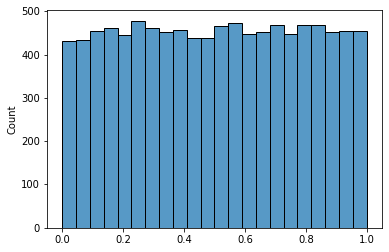

In [81]:
sns.histplot(pvalues)

<AxesSubplot:ylabel='Count'>

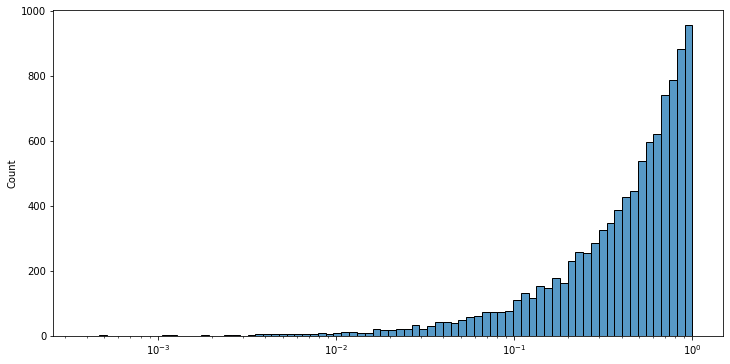

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(pvalues, log_scale=True)

In [83]:
sum(np.array(pvalues)<0.05)/10000

0.0472

По данным выше видно, что АА тест прокрасился в 4.72% случаев, а значит, значимых отличий в наших выборках нет.